In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv('train.csv')
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [31]:
df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

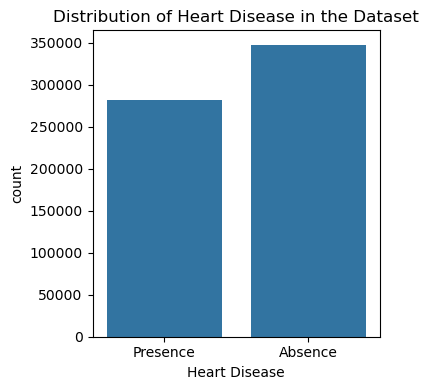

In [32]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='Heart Disease')
plt.title('Distribution of Heart Disease in the Dataset')
plt.tight_layout()
plt.show()

#### -more absent than present, we need to perform balancing of the data

# NUMERICAL FEATURE ANALYSIS

In [33]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [34]:
df = df.drop(columns='id',)
df['Sex'] = df.Sex.astype('category')
df['FBS over 120'] = df['FBS over 120'].astype('category')
df['Exercise angina'] = df['Exercise angina'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Age                      630000 non-null  int64   
 1   Sex                      630000 non-null  category
 2   Chest pain type          630000 non-null  int64   
 3   BP                       630000 non-null  int64   
 4   Cholesterol              630000 non-null  int64   
 5   FBS over 120             630000 non-null  category
 6   EKG results              630000 non-null  int64   
 7   Max HR                   630000 non-null  int64   
 8   Exercise angina          630000 non-null  category
 9   ST depression            630000 non-null  float64 
 10  Slope of ST              630000 non-null  int64   
 11  Number of vessels fluro  630000 non-null  int64   
 12  Thallium                 630000 non-null  int64   
 13  Heart Disease            630000 non-null  ob

In [35]:
num_col = df.select_dtypes(include='number').columns.to_list()
num_col

['Age',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'EKG results',
 'Max HR',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

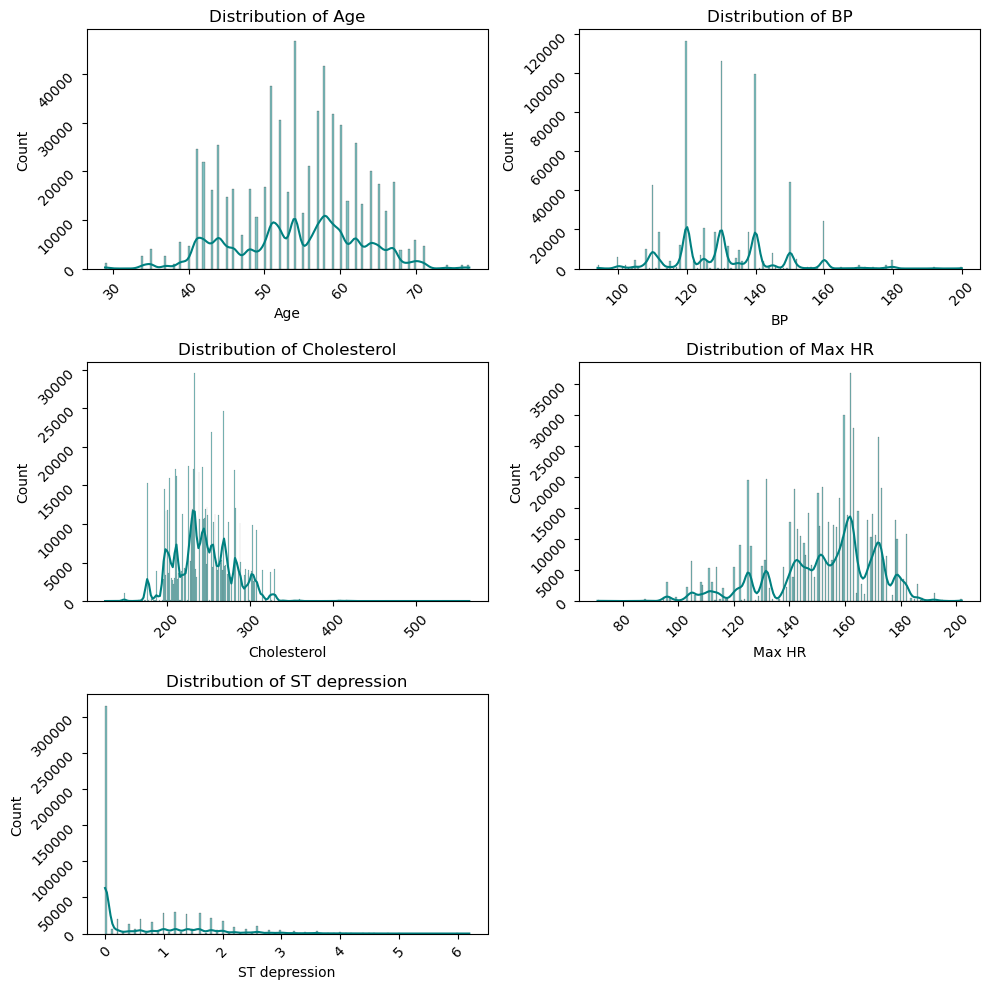

In [49]:
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax = ax.flatten()
numeric_col = ['Age','BP','Cholesterol','Max HR', 'ST depression']
for i, col in enumerate(numeric_col):
    sns.histplot(df[col], kde=True, ax=ax[i], color='teal')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].tick_params(rotation=45)

for ax in ax.flatten():
    if not ax.has_data():
        ax.remove()

plt.tight_layout()
plt.show()

#### - age is almost evenly distributed with most patients between 50 and 65
#### - chelostrol is skewed to the right
#### - Max HR is skewed to the right
#### - ST depression skewed to the right

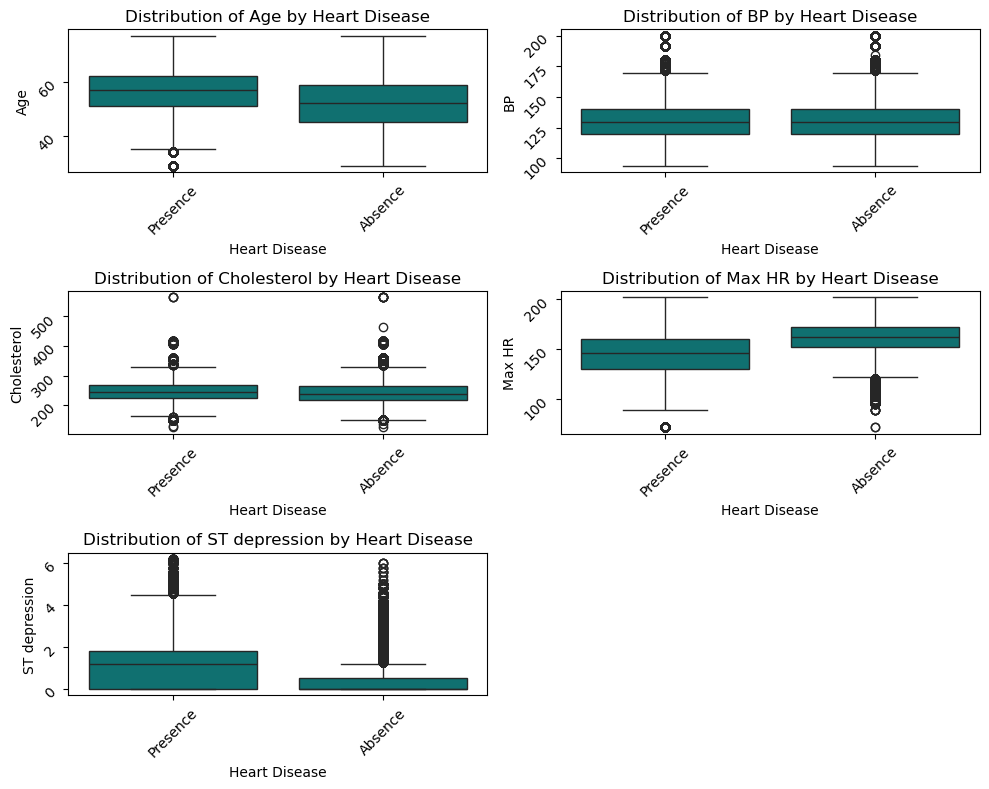

In [48]:
fig, ax = plt.subplots(3,2, figsize=(10,8))
ax = ax.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(y=col, x='Heart Disease', data=df, color='teal', ax=ax[i])
    ax[i].set_title(f'Distribution of {col} by Heart Disease')
    ax[i].tick_params(rotation=45)

for ax in ax.flatten():
    if not ax.has_data():
        ax.remove()

plt.tight_layout()
plt.show()

#### - disease is likely present if age is above 50
#### - likely present if heart rate is below 150
#### -  likely present if ST depression is above 1
#### - Cholestrol and BP shows no impact on heart disease

# PAIR PLOT

In [53]:
numeric_col = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Heart Disease']

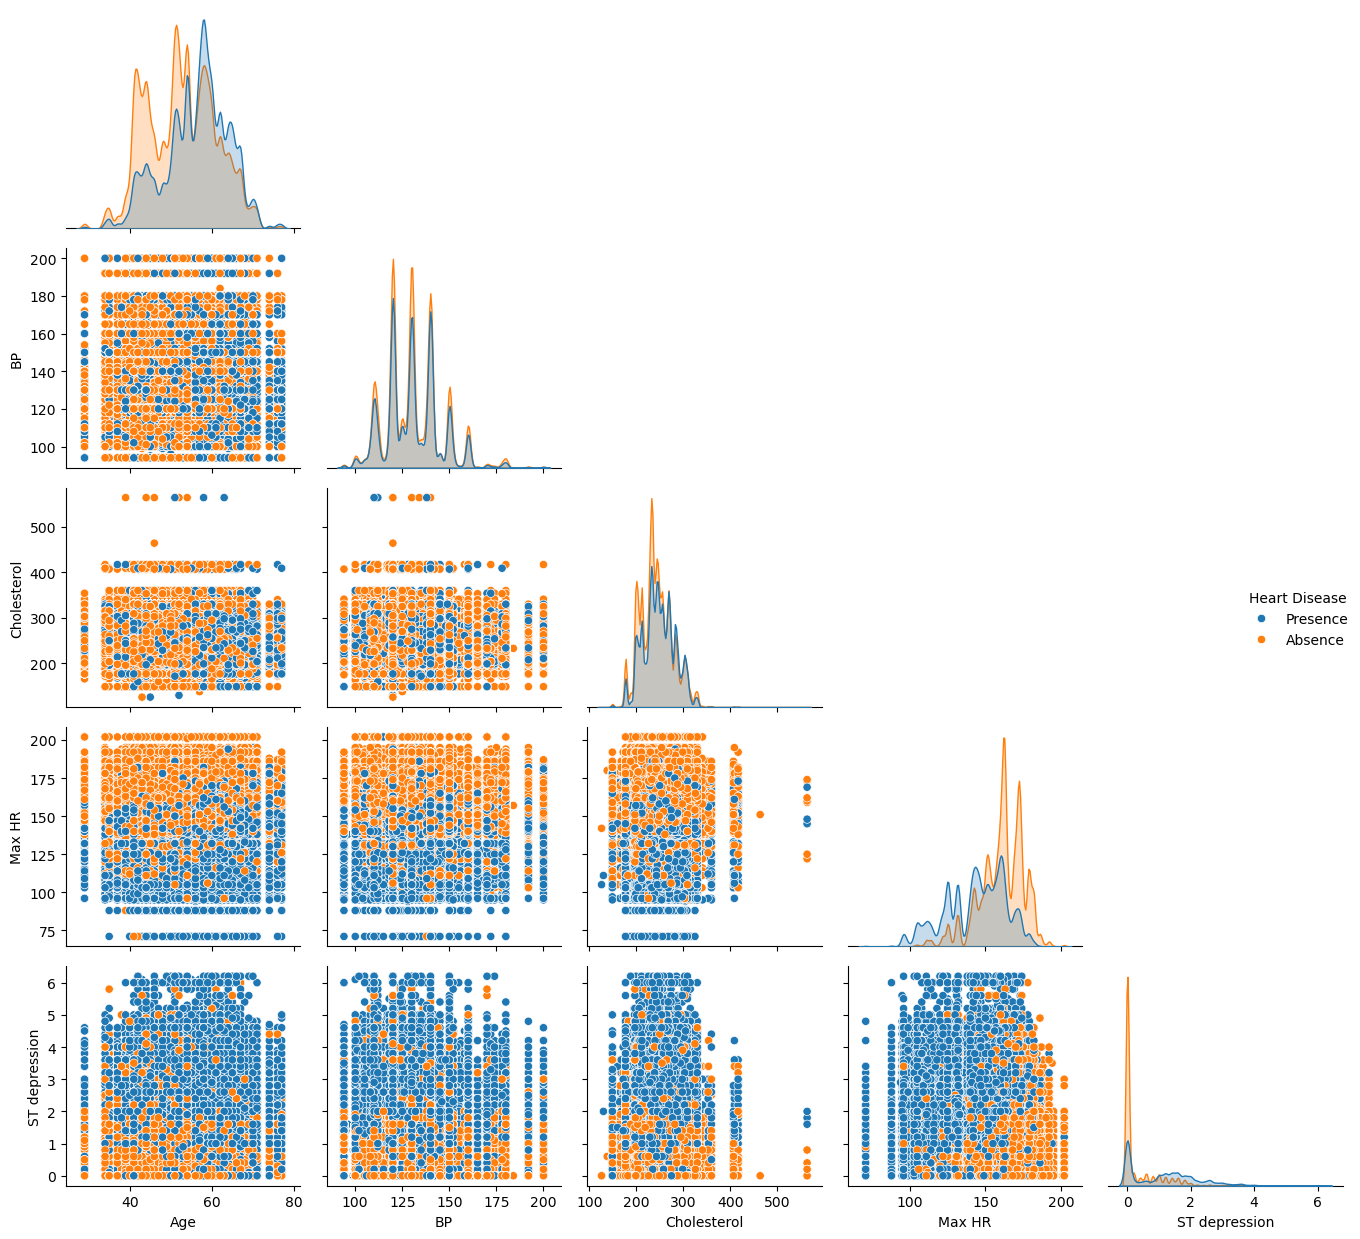

In [54]:
numeric_col
sns.pairplot(df[numeric_col], hue= 'Heart Disease', diag_kind='kde',corner=True, )
plt.tight_layout()
plt.show()

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')